In [2]:
import pandas as pd
import numpy as np
#import lightgbm
import matplotlib.pyplot as plt
import seaborn as sns
#from tensorflow.keras.models import Sequential
%matplotlib inline

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
import tensorflow

In [13]:
from sklearn.model_selection import train_test_split

In [7]:
train=pd.read_csv('HA_Data_Science_train.csv')
test=pd.read_csv('HA_Data_Science_test.csv')

In [8]:
train.head()

,LISTING_KIND,LISTING_CITY,LISTING_PRICE,IS_ARCHIVED,ARCHIVE_REASON,LOGIN_COUNTRY_CODE,LISTING_COUNTRY_CODE,LISTING_REGISTRATION_POSSIBLE,ADVERTISER_COMPLETENESS_SCORE,MANAGED_ACCOUNT,HAS_PROFILE_PIC,BROWSER,OS,IS_SCAMMER,ANONYMISED_EMAIL
0,1,Göteborg,725.00,False,NaN,se,se,0,80,False,1,Mobile Safari,iOS,0,bosqlqg@aol.com
1,1,Göteborg,469.35,False,NaN,se,se,1,70,False,1,Chrome,Android,0,fylm235670@gmail.com
2,1,Elche,200.00,False,NaN,es,es,0,25,False,0,Chrome,Android,0,mhzasjonfobc@gmail.com
3,0,Verona,1500.00,False,NaN,it,it,0,86,False,1,Chrome,Mac OS X,0,uclypkijb@italianflat.com
4,1,Copenhagen,904.16,False,NaN,dk,dk,0,5,False,1,Microsoft Edge,Windows,0,dyrrtatzx.fhcs@outlook.com


In [9]:
test.head()

,LISTING_KIND,LISTING_CITY,LISTING_PRICE,LOGIN_COUNTRY_CODE,LISTING_COUNTRY_CODE,LISTING_REGISTRATION_POSSIBLE,ADVERTISER_COMPLETENESS_SCORE,MANAGED_ACCOUNT,HAS_PROFILE_PIC,BROWSER,OS,ANONYMISED_EMAIL
0,1,Elche,155.00,es,es,0,35,False,1,Chrome,Android,drhzhephmeo@hotmail.com
1,1,Tilburg,420.00,nl,nl,1,40,False,1,Microsoft Edge,Windows,jorpr80ckig@gmail.com
2,1,Las Vegas,591.18,us,us,0,100,False,1,Mobile Safari,iOS,xaswrxawlgba@icloud.com
3,1,Utrecht,700.00,nl,nl,1,60,False,1,Firefox,Mac OS X,gnszyfo@universityhousing.nl
4,1,The Hague,600.00,fr,nl,1,54,False,1,Chrome,Windows,ttcjbtm@ziggo.nl


In [14]:
train.columns

Index(['LISTING_KIND', 'LISTING_CITY', 'LISTING_PRICE', 'IS_ARCHIVED',
       'ARCHIVE_REASON', 'LOGIN_COUNTRY_CODE', 'LISTING_COUNTRY_CODE',
       'LISTING_REGISTRATION_POSSIBLE', 'ADVERTISER_COMPLETENESS_SCORE',
       'MANAGED_ACCOUNT', 'HAS_PROFILE_PIC', 'BROWSER', 'OS', 'IS_SCAMMER',
       'ANONYMISED_EMAIL'],
      dtype='object')

In [21]:
train[train['IS_SCAMMER']==1].head(15)

,LISTING_KIND,LISTING_CITY,LISTING_PRICE,IS_ARCHIVED,ARCHIVE_REASON,LOGIN_COUNTRY_CODE,LISTING_COUNTRY_CODE,LISTING_REGISTRATION_POSSIBLE,ADVERTISER_COMPLETENESS_SCORE,MANAGED_ACCOUNT,HAS_PROFILE_PIC,BROWSER,OS,IS_SCAMMER,ANONYMISED_EMAIL,SAME_CODE,OS_NULL,CODE_NULL
37,0,Amsterdam,500.00,True,scam,pl,nl,0,5,False,0,NaN,NaN,1,qb.tsccjsiyyr@gmail.com,False,True,False
45,0,Los Angeles,1182.36,True,scam,us,us,0,5,False,0,NaN,NaN,1,tyudyfa0913@outlook.com,True,True,False
46,0,Los Angeles,2100.00,True,scam,us,us,1,5,False,0,Chrome,Mac OS X,1,usyrjfrmt51@gmail.com,True,False,False
47,1,Berlin,280.00,True,scam,de,de,0,5,False,0,NaN,NaN,1,kkxrj.kuf@gmx.de,True,True,False
60,0,Utrecht,360.00,True,scam,nl,nl,1,50,False,1,Chrome,Windows,1,brkcny.eqjbmqldml@outlook.com,True,False,False
62,1,Dublin,580.00,True,scam,us,ie,1,5,False,0,Firefox,Windows,1,oczjvxb@gmail.com,False,False,False
83,0,Dublin,1300.00,True,scam,ie,ie,1,5,False,0,Firefox,Windows,1,oc.vbdbhy93@gmail.com,True,False,False
133,0,Rotterdam,1000.00,True,scam,es,nl,1,25,False,0,NaN,NaN,1,ttiebarbnzr.nwryeyqukomlqg@gmail.com,False,True,False
141,0,Rotterdam,700.00,True,scam,nl,nl,0,40,False,1,Chrome,Windows,1,imsalgddpqu@gmail.com,True,False,False
143,1,Rotterdam,700.00,True,scam,nl,nl,1,25,False,0,NaN,NaN,1,klunwojonxrborkdohojahbq@gmx.net,True,True,False


In [15]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16762 entries, 0 to 16761
Data columns (total 15 columns):
LISTING_KIND                     16762 non-null int64
LISTING_CITY                     16762 non-null object
LISTING_PRICE                    16762 non-null float64
IS_ARCHIVED                      16762 non-null bool
ARCHIVE_REASON                   1329 non-null object
LOGIN_COUNTRY_CODE               16733 non-null object
LISTING_COUNTRY_CODE             16762 non-null object
LISTING_REGISTRATION_POSSIBLE    16762 non-null int64
ADVERTISER_COMPLETENESS_SCORE    16762 non-null int64
MANAGED_ACCOUNT                  16762 non-null bool
HAS_PROFILE_PIC                  16762 non-null int64
BROWSER                          15877 non-null object
OS                               15877 non-null object
IS_SCAMMER                       16762 non-null int64
ANONYMISED_EMAIL                 16762 non-null object
dtypes: bool(2), float64(1), int64(5), object(7)
memory usage: 1.7+ MB


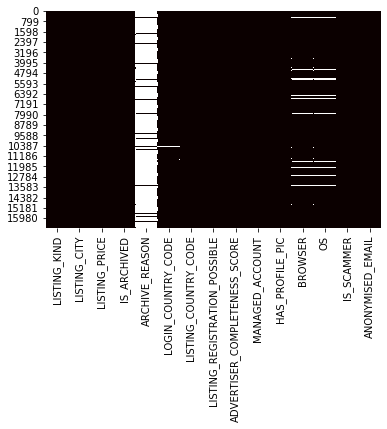

In [17]:
sns.heatmap(train.isnull(),cbar=False,cmap='hot')

In [23]:
train['SAME_CODE']=(train['LOGIN_COUNTRY_CODE']==train['LISTING_COUNTRY_CODE'])
train['OS_NULL']=train['OS'].isnull()
train['CODE_NULL']=train['LOGIN_COUNTRY_CODE'].isnull()
train['EMAIL_LEN']=train['ANONYMISED_EMAIL'].apply(lambda x:len(x))

In [22]:
len('sssss')

5

In [24]:
X=train[['LISTING_KIND', 'LISTING_PRICE',
       'LISTING_REGISTRATION_POSSIBLE', 'ADVERTISER_COMPLETENESS_SCORE',
       'MANAGED_ACCOUNT', 'HAS_PROFILE_PIC',
       'EMAIL_LEN', 'SAME_CODE', 'OS_NULL', 'CODE_NULL']]

In [25]:
y=train['IS_SCAMMER']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [43]:
RFR=RandomForestClassifier(2000,verbose=)
RFR.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
res=RFR.predict(X_test)

In [31]:
sum(res)

199

In [32]:
sum(y_test)

318

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5214
           1       0.75      0.47      0.58       318

    accuracy                           0.96      5532
   macro avg       0.86      0.73      0.78      5532
weighted avg       0.96      0.96      0.96      5532



In [37]:
print(confusion_matrix(y_test,res))

[[5165   49]
 [ 168  150]]


<BarContainer object of 10 artists>

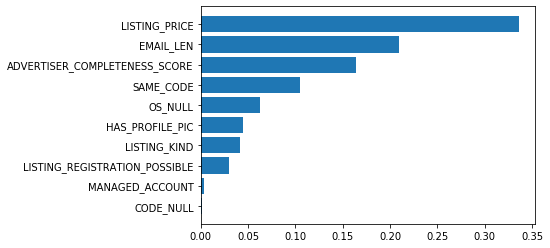

In [42]:
plt.barh(X_test.columns[np.argsort(RFR.feature_importances_)],RFR.feature_importances_[np.argsort(RFR.feature_importances_)])